<a href="https://colab.research.google.com/github/AyraCaps/Dsa-arya/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [ ]:
data=pd.read_csv(r"C:\Users\johne\OneDrive\Desktop\all_india_agriculture_data.csv")
data

,Unnamed: 0,state_names,state_code,district_names,district_code,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure,yield
0,0,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,clay,598.552,0.000,0.000,2000.0,1004,1.594896
1,1,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,sandy,7.182,18.354,0.000,1.0,1004,0.500000
2,2,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.0,1005,3.147059
3,3,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,peaty,8.740,8.740,0.000,641.0,1006,3.642045
4,4,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,clay,0.615,0.615,0.615,165.0,1004,0.229167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,246086,West Bengal,WB,PURULIA,646,2014,Summer,Rice,306.0,298.981061,2.130629,1017.475515,58,sandy,9.630,24.610,0.000,801.0,1008,2.617647
246087,246087,West Bengal,WB,PURULIA,646,2014,Summer,Sesamum,627.0,298.500908,2.597150,1014.759444,57,loamy,56.070,0.000,0.000,463.0,1008,0.738437
246088,246088,West Bengal,WB,PURULIA,646,2014,Whole Year,Sugarcane,324.0,298.278013,2.063913,1015.164139,59,peaty,9.000,9.000,0.000,16250.0,1009,50.154321
246089,246089,West Bengal,WB,PURULIA,646,2014,Winter,Rice,279151.0,297.921484,2.490068,1016.098126,57,silt,0.000,0.000,0.000,597899.0,1009,2.141848


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      246091 non-null  int64  
 1   state_names     246091 non-null  object 
 2   state_code      246091 non-null  object 
 3   district_names  246091 non-null  object 
 4   district_code   246091 non-null  int64  
 5   crop_year       246091 non-null  int64  
 6   season_names    246091 non-null  object 
 7   crop_names      246091 non-null  object 
 8   area            246091 non-null  float64
 9   temperature     246091 non-null  float64
 10  wind_speed      246091 non-null  float64
 11  precipitation   246091 non-null  float64
 12  humidity        246091 non-null  int64  
 13  soil_type       246091 non-null  object 
 14  N               246091 non-null  float64
 15  P               246091 non-null  float64
 16  K               246091 non-null  float64
 17  production

In [ ]:
dd=data[['state_names','crop_names','crop_year','season_names']]
dd

,state_names,crop_names,crop_year,season_names
0,Andaman and Nicobar Islands,Arecanut,2000,Kharif
1,Andaman and Nicobar Islands,Other Kharif pulses,2000,Kharif
2,Andaman and Nicobar Islands,Rice,2000,Kharif
3,Andaman and Nicobar Islands,Banana,2000,Whole Year
4,Andaman and Nicobar Islands,Cashewnut,2000,Whole Year
...,...,...,...,...
246086,West Bengal,Rice,2014,Summer
246087,West Bengal,Sesamum,2014,Summer
246088,West Bengal,Sugarcane,2014,Whole Year
246089,West Bengal,Rice,2014,Winter


### List of crops sorted based on the no. of states they are present in

In [ ]:
dd.groupby('crop_names').nunique().sort_values(by='state_names',ascending=False).head(15)

,state_names,crop_year,season_names
crop_names,,,
Rice,33,19,6
Sugarcane,31,19,6
Maize,31,19,6
Rapeseed &Mustard,30,19,4
Wheat,29,19,5
Arhar/Tur,29,18,6
Sesamum,28,19,6
Groundnut,27,19,6
Urad,27,19,6


### Constructing a new dataset with all the information of only the 4 crops : Wheat, Rice, Sugarcane and Maize

In [ ]:
new=data[(data['crop_names']=='Wheat')|(data['crop_names']=='Rice')|(data['crop_names']=='Sugarcane')|(data['crop_names']=='Maize')]
new

,Unnamed: 0,state_names,state_code,district_names,district_code,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure,yield
2,2,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.00,1005,3.147059
7,7,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Whole Year,Sugarcane,1.0,294.141248,2.279325,1014.852127,43,peaty,4.530,11.778,11.778,2.00,1006,2.000000
12,12,Andaman and Nicobar Islands,AN,NICOBARS,1,2001,Kharif,Rice,83.0,293.715910,2.913301,1015.331829,42,silt,1.728,2.160,0.000,300.00,1004,3.614458
16,16,Andaman and Nicobar Islands,AN,NICOBARS,1,2001,Whole Year,Sugarcane,1.0,293.408608,2.760585,1014.477943,44,loamy,834.164,0.000,0.000,1.00,1006,1.000000
18,18,Andaman and Nicobar Islands,AN,NICOBARS,1,2002,Kharif,Rice,189.2,293.055083,2.057067,1014.314806,43,silt,49.329,0.000,0.000,510.84,1005,2.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246084,246084,West Bengal,WB,PURULIA,646,2014,Rabi,Wheat,1622.0,298.280675,2.524832,1014.396089,59,silty,0.000,0.000,0.000,3663.00,1009,2.258323
246085,246085,West Bengal,WB,PURULIA,646,2014,Summer,Maize,325.0,299.210119,2.729893,1016.099923,59,silt,916.136,0.000,0.000,2039.00,1009,6.273846
246086,246086,West Bengal,WB,PURULIA,646,2014,Summer,Rice,306.0,298.981061,2.130629,1017.475515,58,sandy,9.630,24.610,0.000,801.00,1008,2.617647
246088,246088,West Bengal,WB,PURULIA,646,2014,Whole Year,Sugarcane,324.0,298.278013,2.063913,1015.164139,59,peaty,9.000,9.000,0.000,16250.00,1009,50.154321


In [ ]:
# load the dataset
# first 5 rows
new=pd.read_csv("/content/crop4-data.csv")
new.head()

,Unnamed: 0,state_names,state_code,district_names,district_code,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure,yield
0,2,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.00,1005,3.147059
1,7,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Whole Year,Sugarcane,1.0,294.141248,2.279325,1014.852127,43,peaty,4.530,11.778,11.778,2.00,1006,2.000000
2,12,Andaman and Nicobar Islands,AN,NICOBARS,1,2001,Kharif,Rice,83.0,293.715910,2.913301,1015.331829,42,silt,1.728,2.160,0.000,300.00,1004,3.614458
3,16,Andaman and Nicobar Islands,AN,NICOBARS,1,2001,Whole Year,Sugarcane,1.0,293.408608,2.760585,1014.477943,44,loamy,834.164,0.000,0.000,1.00,1006,1.000000
4,18,Andaman and Nicobar Islands,AN,NICOBARS,1,2002,Kharif,Rice,189.2,293.055083,2.057067,1014.314806,43,silt,49.329,0.000,0.000,510.84,1005,2.700000


### Dropping the unncecssary columns

In [ ]:
new.drop(['Unnamed: 0','state_code','district_names','district_code','yield'],axis=1,inplace=True)

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44871 entries, 2 to 246089
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state_names    44871 non-null  object 
 1   crop_year      44871 non-null  int64  
 2   season_names   44871 non-null  object 
 3   crop_names     44871 non-null  object 
 4   area           44871 non-null  float64
 5   temperature    44871 non-null  float64
 6   wind_speed     44871 non-null  float64
 7   precipitation  44871 non-null  float64
 8   humidity       44871 non-null  int64  
 9   soil_type      44871 non-null  object 
 10  N              44871 non-null  float64
 11  P              44871 non-null  float64
 12  K              44871 non-null  float64
 13  production     44574 non-null  float64
 14  pressure       44871 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
new.describe()

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,production,pressure
count,44871.000000,44871.000000,44871.000000,44871.000000,44871.000000,44871.000000,44871.000000,44871.000000,44871.000000,4.457400e+04,44871.000000
mean,2005.686746,31562.958050,303.312878,2.468838,1016.009626,66.418711,62.167806,13.147292,6.188451,1.962426e+05,1003.741815
std,5.063917,56394.674973,4.560435,0.337584,1.301666,16.357518,204.463444,23.779444,14.141724,9.027233e+05,4.191169
min,1997.000000,0.040000,287.671587,0.272823,1010.352340,32.000000,0.000000,0.000000,0.000000,0.000000e+00,974.000000
25%,2001.000000,426.500000,300.330404,2.214642,1014.972452,54.000000,0.615000,0.000000,0.000000,1.408000e+03,1001.000000
50%,2006.000000,5109.000000,303.409470,2.468823,1015.969989,62.000000,4.068000,3.760000,0.000000,1.530306e+04,1003.000000
75%,2010.000000,37078.500000,307.224352,2.721249,1017.007085,80.000000,10.500000,15.870000,1.501000,1.118082e+05,1006.000000
max,2015.000000,687000.000000,312.363755,4.480037,1027.963207,103.000000,928.372000,111.200000,55.600000,3.715800e+07,1029.000000


In [ ]:
new['state_names'].nunique()

33

In [ ]:
new['season_names'].nunique()

6

In [ ]:
new.isnull().sum()

state_names        0
crop_year          0
season_names       0
crop_names         0
area               0
temperature        0
wind_speed         0
precipitation      0
humidity           0
soil_type          0
N                  0
P                  0
K                  0
production       297
pressure           0
dtype: int64

### Deleted all the rows with missing values

In [ ]:
new.dropna(inplace=True)

In [ ]:
new.shape

(44574, 15)

In [ ]:
new.describe()

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,production,pressure
count,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,4.457400e+04,44574.000000
mean,2005.675439,31748.836146,303.296734,2.469019,1016.009404,66.467829,62.126018,13.146419,6.187694,1.962426e+05,1003.752389
std,5.069206,56484.153244,4.560690,0.337772,1.302390,16.363367,204.361396,23.779302,14.141557,9.027233e+05,4.152820
min,1997.000000,0.200000,287.671587,0.272823,1010.352340,32.000000,0.000000,0.000000,0.000000,0.000000e+00,974.000000
25%,2001.000000,453.000000,300.313121,2.214877,1014.971510,54.000000,0.615000,0.000000,0.000000,1.408000e+03,1001.000000
50%,2006.000000,5263.500000,303.386195,2.468864,1015.968500,62.000000,4.068000,3.760000,0.000000,1.530306e+04,1003.000000
75%,2010.000000,37513.750000,307.211287,2.721607,1017.007318,80.000000,10.500000,15.870000,1.501000,1.118082e+05,1006.000000
max,2015.000000,687000.000000,312.363755,4.480037,1027.963207,103.000000,928.372000,111.200000,55.600000,3.715800e+07,1029.000000


### Making a copy of the dataset to perform operations

In [ ]:
nn=new.copy()

In [ ]:
num_columns=nn.select_dtypes(include=['float64','int64'])

## Checking for outliers

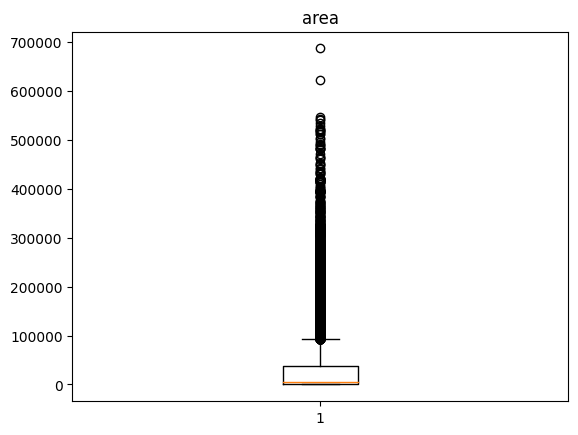

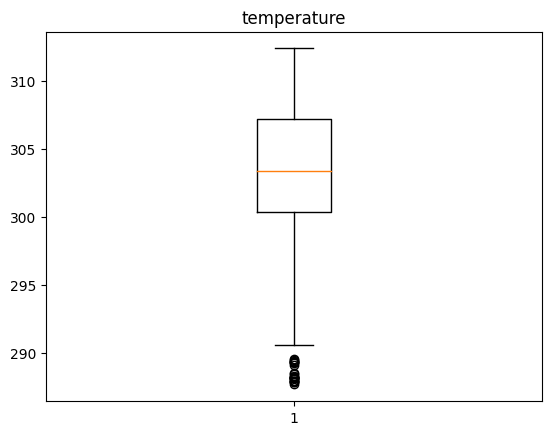

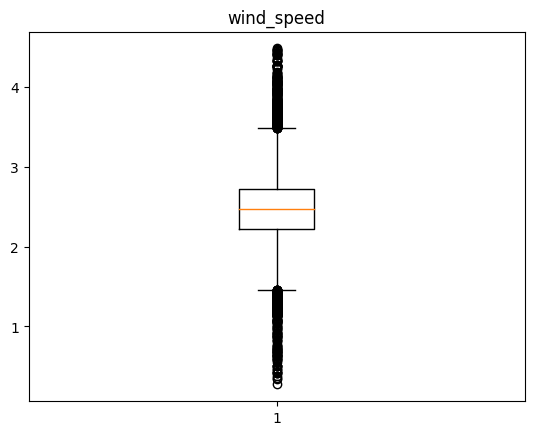

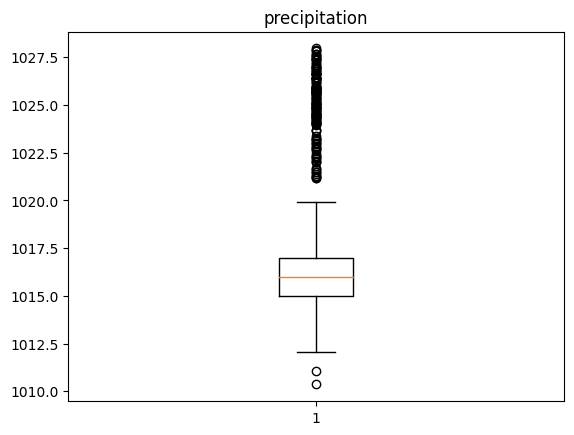

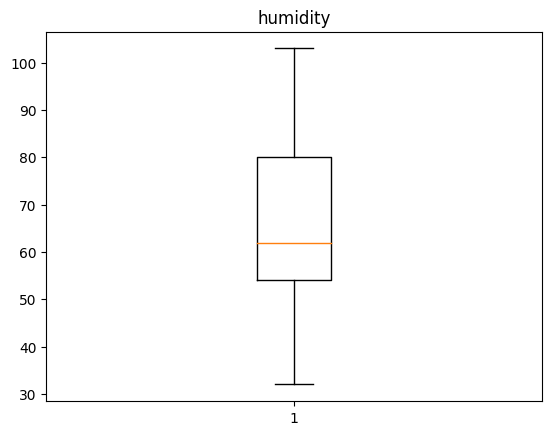

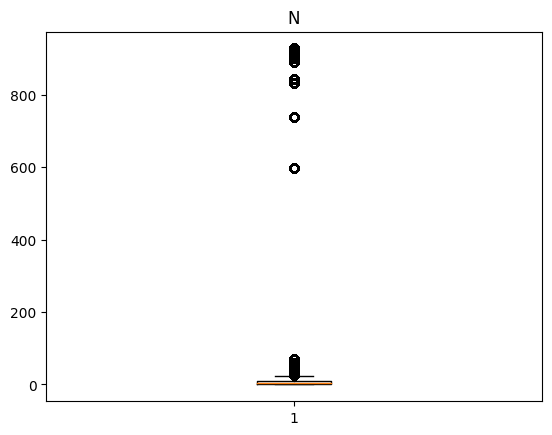

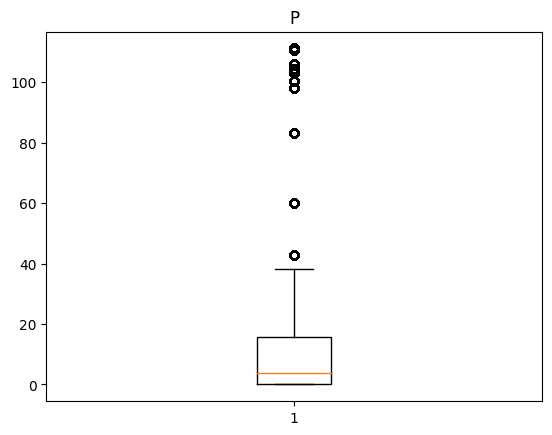

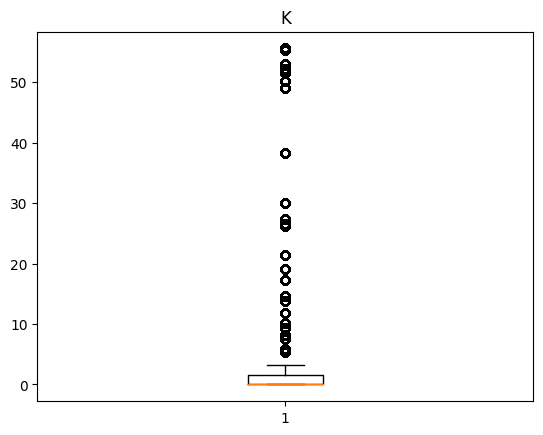

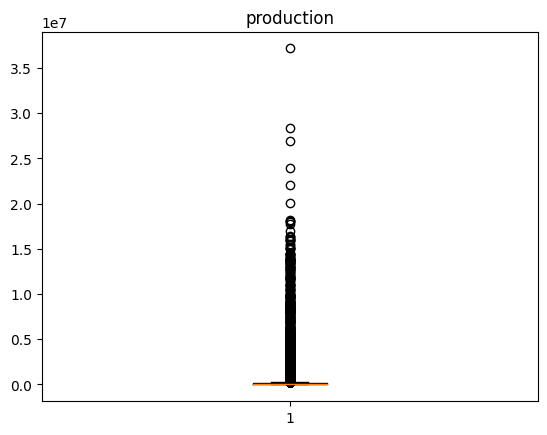

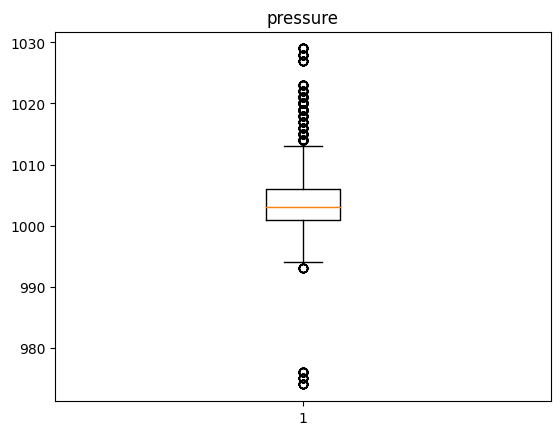

In [ ]:
for i in num_columns.drop('crop_year',axis=1):
  plt.figure()
  plt.boxplot(nn[i])
  plt.title(i);

## Handling outliers

In [ ]:
for i in num_columns.drop('crop_year',axis=1):
  print('  ', i)
  print('  ----')
  print('Outlier handling of', i)

  #Calculating the interquartile range
  Q1 = np.percentile(nn[i],25,method='midpoint')
  Q2 = np.percentile(nn[i],50,method='midpoint')
  Q3 = np.percentile(nn[i],75,method='midpoint')
  IQR =Q3 - Q1


  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)


  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )

  #Finding outliers
  outliers =[]


  for x in nn[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)


  print('outliers : ',outliers)
 # upper values and lower values are replaced by upper limit and lower limit (respectively)by using clip function
  nn[i] = nn[i].clip(lower=low_lim ,upper=up_lim)


   area
  ----
Outlier handling of area
Q1 is:  453.0
Q2 is:  5263.5
Q3 is:  37513.5
IQR = 37060.5
lower limit =  -55137.75
upper limit   93104.25
outliers :  [214100.0, 154400.0, 256300.0, 157600.0, 244655.0, 161551.0, 253966.0, 162861.0, 220811.0, 165779.0, 194809.0, 106427.0, 234673.0, 165321.0, 224521.0, 162903.0, 217411.0, 170012.0, 227930.0, 168963.0, 242000.0, 169000.0, 240231.0, 169861.0, 202153.0, 104423.0, 237640.0, 172888.0, 197445.0, 139649.0, 232300.0, 168756.0, 235159.0, 169523.0, 226072.0, 168045.0, 394117.0, 295000.0, 298400.0, 302886.0, 292899.0, 272468.0, 202953.0, 170487.0, 240404.0, 288879.0, 288638.0, 283000.0, 281491.0, 95547.0, 190526.0, 112342.0, 271072.0, 281790.0, 174699.0, 280060.0, 255607.0, 285302.0, 257900.0, 116300.0, 280800.0, 134500.0, 278415.0, 127888.0, 281343.0, 112917.0, 245114.0, 98472.0, 243910.0, 222367.0, 245306.0, 254919.0, 104332.0, 251433.0, 94862.0, 261000.0, 94000.0, 273878.0, 120655.0, 228196.0, 108442.0, 260350.0, 94991.0, 262826.0, 25316

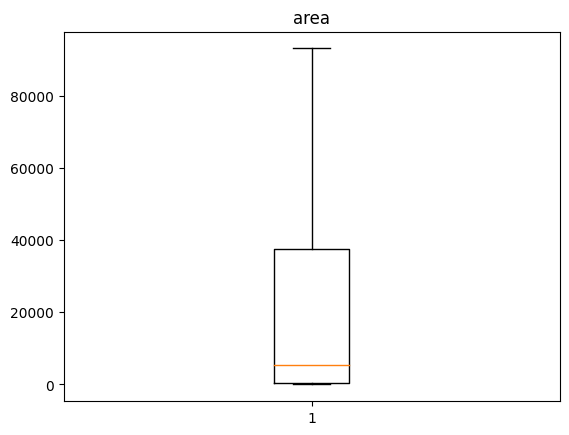

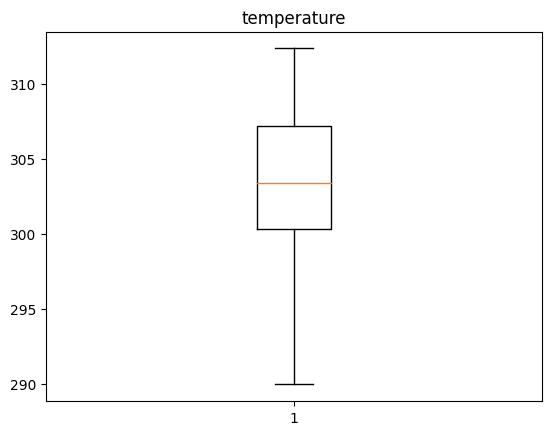

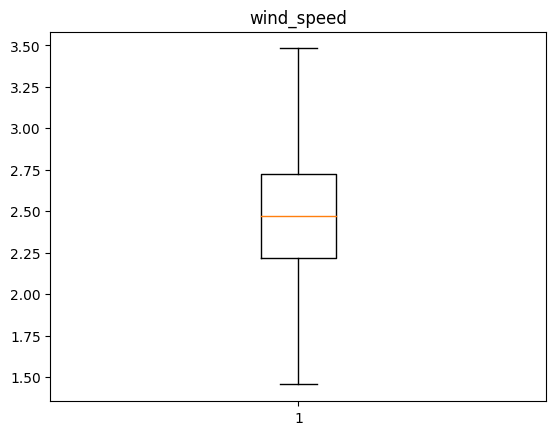

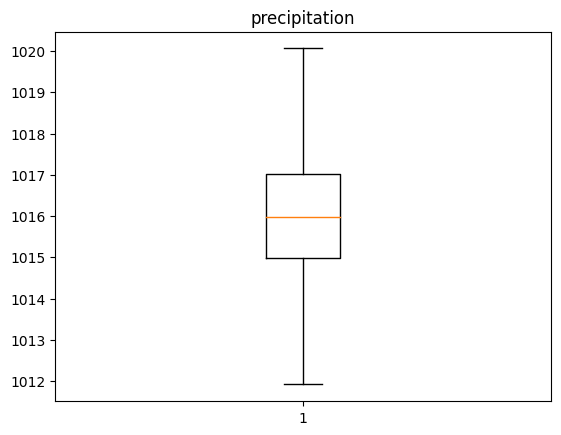

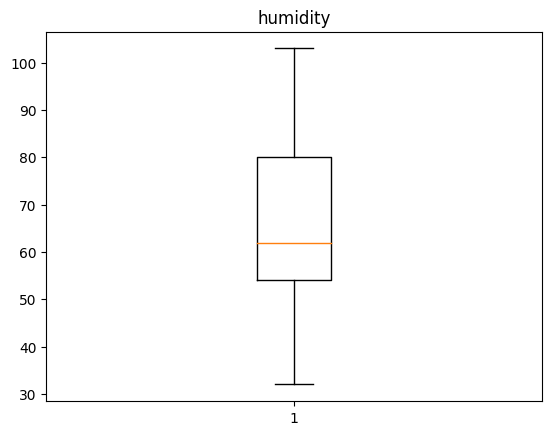

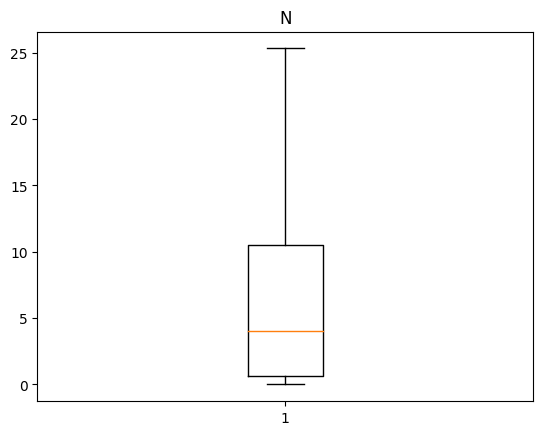

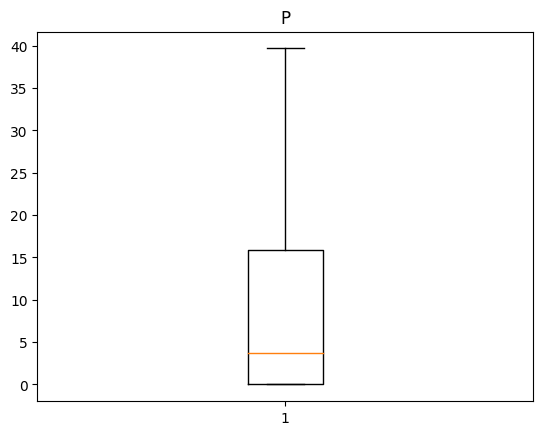

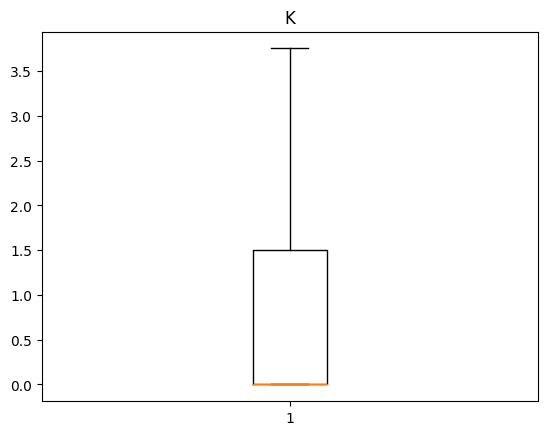

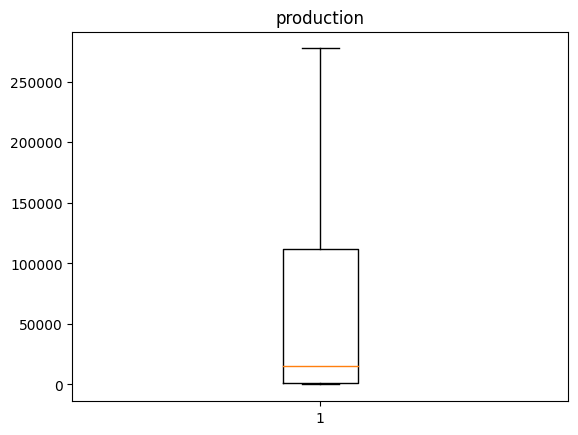

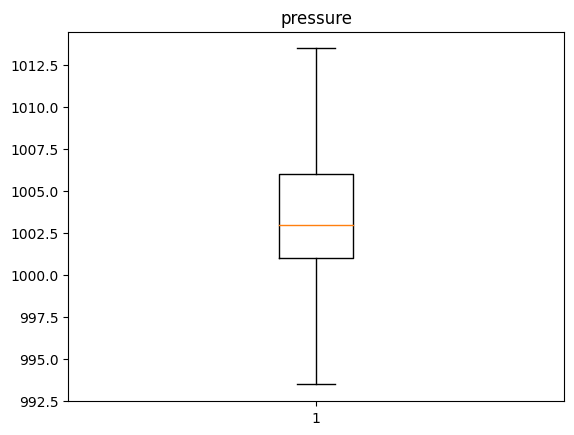

In [ ]:
for i in num_columns.drop('crop_year',axis=1):
  plt.figure()
  plt.boxplot(nn[i])
  plt.title(i);

In [ ]:
nn.shape

(44574, 15)

In [ ]:
nn

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,Andaman and Nicobar Islands,2000,Kharif,Rice,102.00,294.087464,2.139227,1015.611196,42,clay,25.3275,0.000,0.0000,321.00,1005.0
1,Andaman and Nicobar Islands,2000,Whole Year,Sugarcane,1.00,294.141248,2.279325,1014.852127,43,peaty,4.5300,11.778,3.7525,2.00,1006.0
2,Andaman and Nicobar Islands,2001,Kharif,Rice,83.00,293.715910,2.913301,1015.331829,42,silt,1.7280,2.160,0.0000,300.00,1004.0
3,Andaman and Nicobar Islands,2001,Whole Year,Sugarcane,1.00,293.408608,2.760585,1014.477943,44,loamy,25.3275,0.000,0.0000,1.00,1006.0
4,Andaman and Nicobar Islands,2002,Kharif,Rice,189.20,293.055083,2.057067,1014.314806,43,silt,25.3275,0.000,0.0000,510.84,1005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44866,West Bengal,2014,Rabi,Wheat,1622.00,298.280675,2.524832,1014.396089,59,silty,0.0000,0.000,0.0000,3663.00,1009.0
44867,West Bengal,2014,Summer,Maize,325.00,299.210119,2.729893,1016.099923,59,silt,25.3275,0.000,0.0000,2039.00,1009.0
44868,West Bengal,2014,Summer,Rice,306.00,298.981061,2.130629,1017.475515,58,sandy,9.6300,24.610,0.0000,801.00,1008.0
44869,West Bengal,2014,Whole Year,Sugarcane,324.00,298.278013,2.063913,1015.164139,59,peaty,9.0000,9.000,0.0000,16250.00,1009.0


## Resetting the index

In [ ]:
final=nn.reset_index()

## To check for significant correlation between the numerical columns

<Axes: >

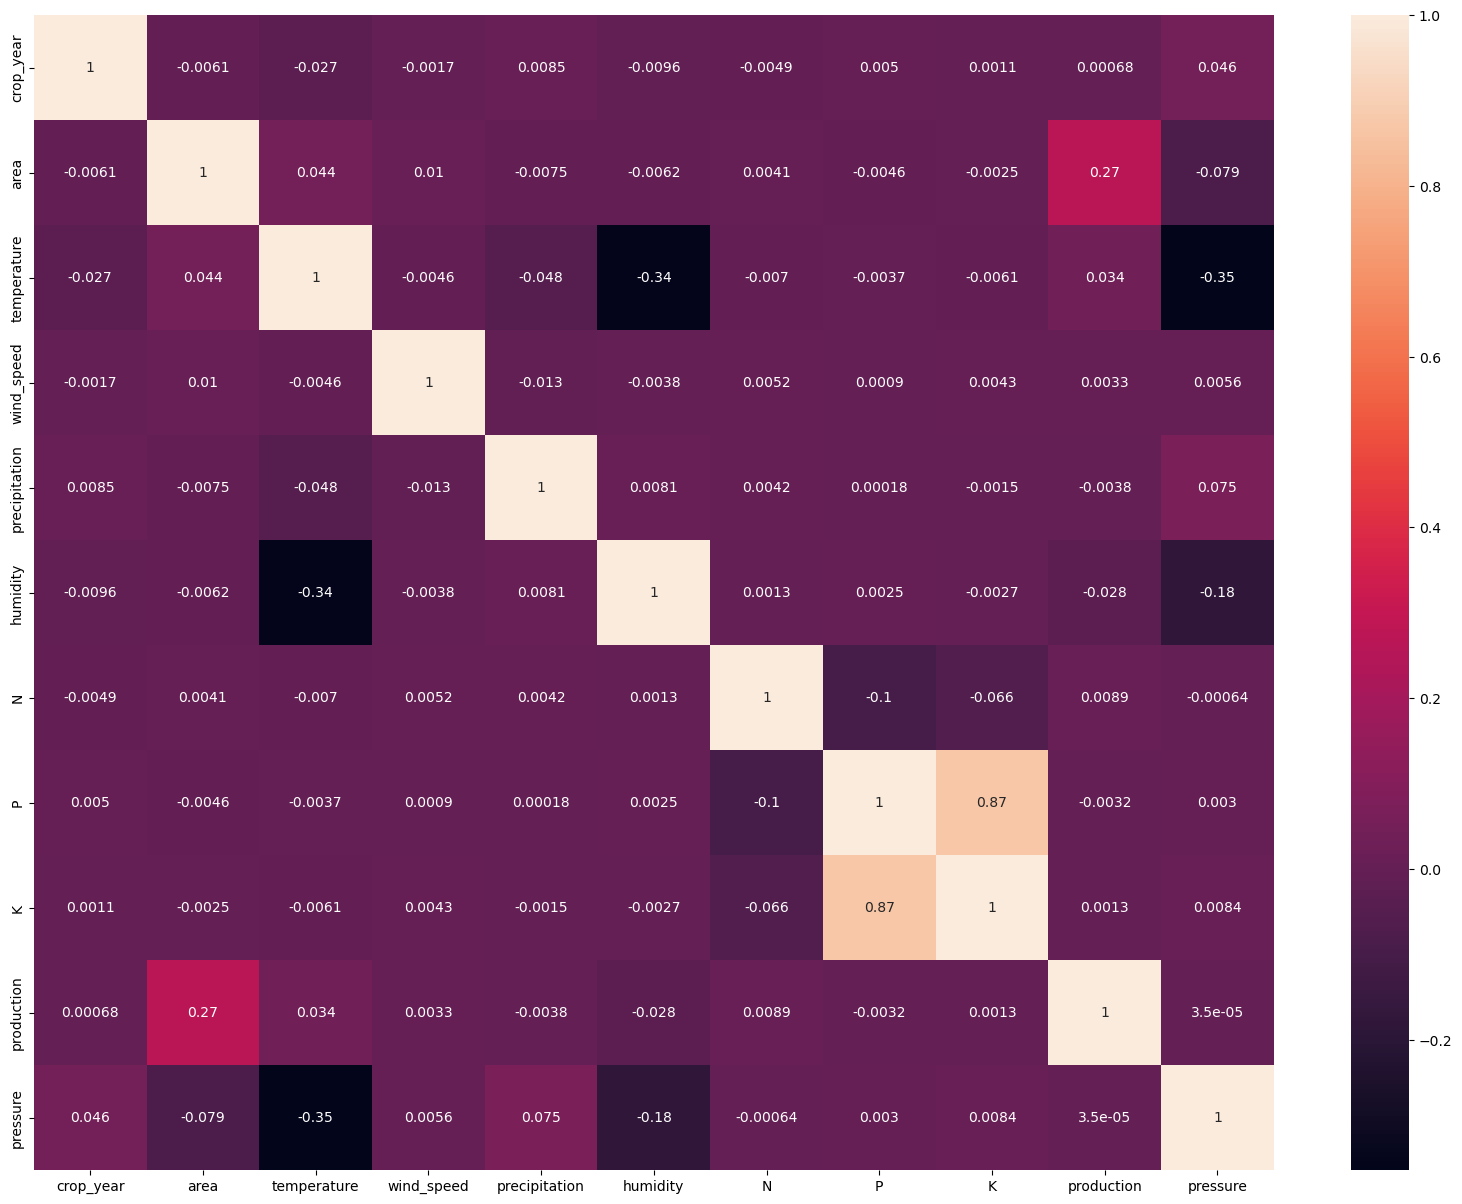

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(num_columns.corr(),annot=True)

### Dropping the column 'K', due to its high correlation with P

In [ ]:
final.drop(['K','N','P'],axis=1,inplace=True)

In [ ]:
final.drop('index',axis=1,inplace=True)
final

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,production,pressure
0,Andaman and Nicobar Islands,2000,Kharif,Rice,102.00,294.087464,2.139227,1015.611196,42,clay,321.00,1005.0
1,Andaman and Nicobar Islands,2000,Whole Year,Sugarcane,1.00,294.141248,2.279325,1014.852127,43,peaty,2.00,1006.0
2,Andaman and Nicobar Islands,2001,Kharif,Rice,83.00,293.715910,2.913301,1015.331829,42,silt,300.00,1004.0
3,Andaman and Nicobar Islands,2001,Whole Year,Sugarcane,1.00,293.408608,2.760585,1014.477943,44,loamy,1.00,1006.0
4,Andaman and Nicobar Islands,2002,Kharif,Rice,189.20,293.055083,2.057067,1014.314806,43,silt,510.84,1005.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44569,West Bengal,2014,Rabi,Wheat,1622.00,298.280675,2.524832,1014.396089,59,silty,3663.00,1009.0
44570,West Bengal,2014,Summer,Maize,325.00,299.210119,2.729893,1016.099923,59,silt,2039.00,1009.0
44571,West Bengal,2014,Summer,Rice,306.00,298.981061,2.130629,1017.475515,58,sandy,801.00,1008.0
44572,West Bengal,2014,Whole Year,Sugarcane,324.00,298.278013,2.063913,1015.164139,59,peaty,16250.00,1009.0


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44574 entries, 0 to 44573
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state_names    44574 non-null  object 
 1   crop_year      44574 non-null  int64  
 2   season_names   44574 non-null  object 
 3   crop_names     44574 non-null  object 
 4   area           44574 non-null  float64
 5   temperature    44574 non-null  float64
 6   wind_speed     44574 non-null  float64
 7   precipitation  44574 non-null  float64
 8   humidity       44574 non-null  int64  
 9   soil_type      44574 non-null  object 
 10  production     44574 non-null  float64
 11  pressure       44574 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 4.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in final[['state_names','season_names','crop_names','soil_type']]:
    final[i]=le.fit_transform(final[i])


In [ ]:
final

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,production,pressure
0,0,2000,1,1,102.00,294.087464,2.139227,1015.611196,42,1,321.00,1005.0
1,0,2000,4,2,1.00,294.141248,2.279325,1014.852127,43,3,2.00,1006.0
2,0,2001,1,1,83.00,293.715910,2.913301,1015.331829,42,5,300.00,1004.0
3,0,2001,4,2,1.00,293.408608,2.760585,1014.477943,44,2,1.00,1006.0
4,0,2002,1,1,189.20,293.055083,2.057067,1014.314806,43,5,510.84,1005.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44569,32,2014,2,3,1622.00,298.280675,2.524832,1014.396089,59,6,3663.00,1009.0
44570,32,2014,3,0,325.00,299.210119,2.729893,1016.099923,59,5,2039.00,1009.0
44571,32,2014,3,1,306.00,298.981061,2.130629,1017.475515,58,4,801.00,1008.0
44572,32,2014,4,2,324.00,298.278013,2.063913,1015.164139,59,3,16250.00,1009.0


In [ ]:
final.describe()

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,production,pressure
count,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000
mean,17.296316,2005.675439,2.145780,1.219769,23764.333872,303.297517,2.468578,1015.991656,66.467829,2.999305,71988.387684,1003.704828
std,10.070178,5.069206,1.379381,1.069387,32899.371585,4.558251,0.321142,1.205302,16.363367,2.002517,99840.976746,3.838096
min,0.000000,1997.000000,0.000000,0.000000,0.200000,289.965938,1.454797,1011.917914,32.000000,0.000000,0.000000,993.500000
25%,9.000000,2001.000000,1.000000,0.000000,453.000000,300.313121,2.214877,1014.971510,54.000000,1.000000,1408.000000,1001.000000
50%,17.000000,2006.000000,2.000000,1.000000,5263.500000,303.386195,2.468864,1015.968500,62.000000,3.000000,15303.065000,1003.000000
75%,27.000000,2010.000000,3.000000,2.000000,37513.750000,307.211287,2.721607,1017.007318,80.000000,5.000000,111808.250000,1006.000000
max,32.000000,2015.000000,5.000000,3.000000,93104.250000,312.363755,3.481684,1020.060844,103.000000,6.000000,277406.750000,1013.500000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
scaled_sc=sc.fit_transform(final.drop(['state_names','season_names','crop_names','soil_type'],axis=1))
scaled=pd.DataFrame(scaled_sc)
scaled.columns=final.drop(['state_names','season_names','crop_names','soil_type'],axis=1).columns
scaled

,crop_year,area,temperature,wind_speed,precipitation,humidity,production,pressure
0,-1.119604,-0.719242,-2.020546,-1.025572,-0.315659,-1.495298,-0.717823,0.337456
1,-1.119604,-0.722312,-2.008747,-0.589320,-0.945441,-1.434185,-0.721019,0.598004
2,-0.922332,-0.719819,-2.102060,1.384833,-0.547443,-1.495298,-0.718034,0.076907
3,-0.922332,-0.722312,-2.169477,0.909285,-1.255892,-1.373072,-0.721029,0.598004
4,-0.725060,-0.716591,-2.247035,-1.281413,-1.391244,-1.434185,-0.715922,0.337456
...,...,...,...,...,...,...,...,...
44569,1.642201,-0.673040,-1.100619,0.175172,-1.323805,-0.456380,-0.684350,1.379651
44570,1.642201,-0.712463,-0.896713,0.813716,0.089827,-0.456380,-0.700616,1.379651
44571,1.642201,-0.713041,-0.946965,-1.052348,1.231124,-0.517493,-0.713016,1.119102
44572,1.642201,-0.712494,-1.101203,-1.260094,-0.686571,-0.456380,-0.558278,1.379651


In [ ]:
scaled=pd.concat([scaled,final[['state_names','season_names','crop_names','soil_type']]],axis=1,join='outer')
scaled

,crop_year,area,temperature,wind_speed,precipitation,humidity,production,pressure,state_names,season_names,crop_names,soil_type
0,-1.119604,-0.719242,-2.020546,-1.025572,-0.315659,-1.495298,-0.717823,0.337456,0,1,1,1
1,-1.119604,-0.722312,-2.008747,-0.589320,-0.945441,-1.434185,-0.721019,0.598004,0,4,2,3
2,-0.922332,-0.719819,-2.102060,1.384833,-0.547443,-1.495298,-0.718034,0.076907,0,1,1,5
3,-0.922332,-0.722312,-2.169477,0.909285,-1.255892,-1.373072,-0.721029,0.598004,0,4,2,2
4,-0.725060,-0.716591,-2.247035,-1.281413,-1.391244,-1.434185,-0.715922,0.337456,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
44569,1.642201,-0.673040,-1.100619,0.175172,-1.323805,-0.456380,-0.684350,1.379651,32,2,3,6
44570,1.642201,-0.712463,-0.896713,0.813716,0.089827,-0.456380,-0.700616,1.379651,32,3,0,5
44571,1.642201,-0.713041,-0.946965,-1.052348,1.231124,-0.517493,-0.713016,1.119102,32,3,1,4
44572,1.642201,-0.712494,-1.101203,-1.260094,-0.686571,-0.456380,-0.558278,1.379651,32,4,2,3


### Dividing the dataset into x (for independent variables) and y (for dependent variable)

In [ ]:
x=scaled.drop('production',axis=1)
y=scaled['production']

### Splitting the dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
scaled_xtrain,scaled_xtest,y_train,y_test=train_test_split(x,y,random_state=39,test_size=0.2)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_loss')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()




In [ ]:

models = {
'Linear Regression': lin,
'Decision Tree Regression': dtr,
'Gradient Boosting Regression': gbr,
'K-nearest Neighbour 5': knn,
'Random Forest Regression': rfr}

In [ ]:
for name, model in models.items():
    model.fit(scaled_xtrain, y_train)
    y_pred = model.predict(scaled_xtest)
    rsq = r2_score(y_test, y_pred)
    mse= mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f'{name}: \nR-sqr: {rsq:.4f}')
    print('MSE: ',mse)
    print('MAE Score is : ',mae)
    print("Root Mean Squared Error (RMSE):", rmse)
    print('............................ ')

Linear Regression: 
R-sqr: 0.6562
MSE:  0.34144244216048747
MAE Score is :  0.3772408463422246
Root Mean Squared Error (RMSE): 0.5843307643454069
............................ 
Decision Tree Regression: 
R-sqr: 0.9163
MSE:  0.08314495387078526
MAE Score is :  0.11944633434360453
Root Mean Squared Error (RMSE): 0.2883486671909292
............................ 
Gradient Boosting Regression: 
R-sqr: 0.9188
MSE:  0.08061853813481687
MAE Score is :  0.16743320037339102
Root Mean Squared Error (RMSE): 0.2839340383518976
............................ 
K-nearest Neighbour 5: 
R-sqr: 0.7970
MSE:  0.2016103536080735
MAE Score is :  0.24399947973498934
Root Mean Squared Error (RMSE): 0.44901041592381075
............................ 
Random Forest Regression: 
R-sqr: 0.9598
MSE:  0.039969660152026534
MAE Score is :  0.09038658389025883
Root Mean Squared Error (RMSE): 0.19992413599169695
............................ 


In [ ]:
for name, model in models.items():
  test_score=model.score(scaled_xtest,y_test)
  train_score=model.score(scaled_xtrain,y_train)
  print(f'{name}:\ntest_score: {rsq:.4f}\ntrain_score: {train_score:.4f}')
  print('---------------')

Linear Regression:
test_score: 0.9598
train_score: 0.6556
---------------
Decision Tree Regression:
test_score: 0.9598
train_score: 1.0000
---------------
Gradient Boosting Regression:
test_score: 0.9598
train_score: 0.9187
---------------
K-nearest Neighbour 5:
test_score: 0.9598
train_score: 0.8693
---------------
Random Forest Regression:
test_score: 0.9598
train_score: 0.9942
---------------


## Feature Importance

In [ ]:
importances = rfr.feature_importances_
feature_importances_df = pd.DataFrame({
    "feature": scaled_xtrain.columns,
    "importance": importances*100
})

feature_importances_df = feature_importances_df.sort_values(by="importance", ascending=False)
feature_importances_df

,feature,importance
1,area,66.634091
9,crop_names,14.669062
8,season_names,9.417126
7,state_names,3.016981
2,temperature,1.235426
5,humidity,1.209454
6,pressure,1.173928
0,crop_year,1.091423
3,wind_speed,0.671913
4,precipitation,0.588410


## Forward Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
forward_feature_selection = SequentialFeatureSelector(RandomForestRegressor(n_jobs=-1),k_features=(1,11),forward=True,floating=False,verbose=2,scoring="r2",cv=5).fit(scaled_xtrain,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   54.8s finished

[2024-06-02 11:45:27] Features: 1/11 -- score: 0.5029963143862488[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished

[2024-06-02 11:46:43] Features: 2/11 -- score: 0.8713656991405705[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min finished

[2024-06-02 11:47:51] Features: 3/11 -- score: 0.9358481642853267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
forward_feature_selection.k_feature_idx_

(0, 1, 2, 5, 6, 7, 8, 9)

In [ ]:
forward_feature_selection.k_feature_names_

('crop_year',
 'area',
 'temperature',
 'humidity',
 'pressure',
 'state_names',
 'season_names',
 'crop_names')

In [ ]:
dd=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
dd

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5095391858380485, 0.5113950390333506, 0.502...",0.502996,"(area,)",0.009336,0.007264,0.003632
2,"(1, 9)","[0.8747784471606086, 0.8627608120927449, 0.879...",0.871366,"(area, crop_names)",0.008157,0.006346,0.003173
3,"(1, 7, 9)","[0.9358662876670925, 0.9348280344453956, 0.931...",0.935848,"(area, state_names, crop_names)",0.003635,0.002828,0.001414
4,"(1, 5, 7, 9)","[0.948868662651953, 0.9459259915176104, 0.9457...",0.948758,"(area, humidity, state_names, crop_names)",0.003535,0.00275,0.001375
5,"(0, 1, 5, 7, 9)","[0.9538440439886461, 0.9525031743719643, 0.956...",0.955177,"(crop_year, area, humidity, state_names, crop_...",0.002204,0.001715,0.000857
6,"(0, 1, 2, 5, 7, 9)","[0.9578657877630585, 0.9546731078292119, 0.957...",0.957641,"(crop_year, area, temperature, humidity, state...",0.002194,0.001707,0.000853
7,"(0, 1, 2, 5, 7, 8, 9)","[0.960131564747789, 0.9572220354861605, 0.9603...",0.959081,"(crop_year, area, temperature, humidity, state...",0.001487,0.001157,0.000579
8,"(0, 1, 2, 5, 6, 7, 8, 9)","[0.959967090187773, 0.9595339569012895, 0.9608...",0.960319,"(crop_year, area, temperature, humidity, press...",0.001168,0.000909,0.000454
9,"(0, 1, 2, 5, 6, 7, 8, 9, 10)","[0.9592091766613134, 0.9582325654894445, 0.961...",0.959916,"(crop_year, area, temperature, humidity, press...",0.001759,0.001368,0.000684
10,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10)","[0.9578238538648509, 0.9558666954108097, 0.959...",0.958069,"(crop_year, area, temperature, precipitation, ...",0.001586,0.001234,0.000617


### Features dropped based on feature importance and forward feature selection

In [ ]:
scaled.drop(['wind_speed','precipitation','soil_type'],axis=1,inplace=True)
scaled

,crop_year,area,temperature,humidity,production,pressure,state_names,season_names,crop_names
0,-1.119604,-0.719242,-2.020546,-1.495298,-0.717823,0.337456,0,1,1
1,-1.119604,-0.722312,-2.008747,-1.434185,-0.721019,0.598004,0,4,2
2,-0.922332,-0.719819,-2.102060,-1.495298,-0.718034,0.076907,0,1,1
3,-0.922332,-0.722312,-2.169477,-1.373072,-0.721029,0.598004,0,4,2
4,-0.725060,-0.716591,-2.247035,-1.434185,-0.715922,0.337456,0,1,1
...,...,...,...,...,...,...,...,...,...
44569,1.642201,-0.673040,-1.100619,-0.456380,-0.684350,1.379651,32,2,3
44570,1.642201,-0.712463,-0.896713,-0.456380,-0.700616,1.379651,32,3,0
44571,1.642201,-0.713041,-0.946965,-0.517493,-0.713016,1.119102,32,3,1
44572,1.642201,-0.712494,-1.101203,-0.456380,-0.558278,1.379651,32,4,2


In [ ]:
X=scaled.drop('production',axis=1)
Y=scaled['production']

In [ ]:
X


,crop_year,area,temperature,humidity,pressure,state_names,season_names,crop_names
0,-1.119604,-0.719242,-2.020546,-1.495298,0.337456,0,1,1
1,-1.119604,-0.722312,-2.008747,-1.434185,0.598004,0,4,2
2,-0.922332,-0.719819,-2.102060,-1.495298,0.076907,0,1,1
3,-0.922332,-0.722312,-2.169477,-1.373072,0.598004,0,4,2
4,-0.725060,-0.716591,-2.247035,-1.434185,0.337456,0,1,1
...,...,...,...,...,...,...,...,...
44569,1.642201,-0.673040,-1.100619,-0.456380,1.379651,32,2,3
44570,1.642201,-0.712463,-0.896713,-0.456380,1.379651,32,3,0
44571,1.642201,-0.713041,-0.946965,-0.517493,1.119102,32,3,1
44572,1.642201,-0.712494,-1.101203,-0.456380,1.379651,32,4,2


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [ ]:
rfr_model=rfr.fit(X_train,Y_train)
rfr_pred=rfr_model.predict(X_test)

In [ ]:
print('R2 Score is:',r2_score(Y_test,rfr_pred))
print('MSE: ',mean_squared_error(Y_test,rfr_pred))
print('MAE Score is : ',mean_absolute_error(Y_test,rfr_pred))
rmse = np.sqrt(mean_squared_error(Y_test,rfr_pred))
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score is: 0.9623309168626426
MSE:  0.03785195535669519
MAE Score is :  0.0857338567294721
Root Mean Squared Error (RMSE): 0.19455578983082253


In [ ]:
scaled

,crop_year,area,temperature,humidity,production,pressure,state_names,season_names,crop_names
0,-1.119604,-0.719242,-2.020546,-1.495298,-0.717823,0.337456,0,1,1
1,-1.119604,-0.722312,-2.008747,-1.434185,-0.721019,0.598004,0,4,2
2,-0.922332,-0.719819,-2.102060,-1.495298,-0.718034,0.076907,0,1,1
3,-0.922332,-0.722312,-2.169477,-1.373072,-0.721029,0.598004,0,4,2
4,-0.725060,-0.716591,-2.247035,-1.434185,-0.715922,0.337456,0,1,1
...,...,...,...,...,...,...,...,...,...
44569,1.642201,-0.673040,-1.100619,-0.456380,-0.684350,1.379651,32,2,3
44570,1.642201,-0.712463,-0.896713,-0.456380,-0.700616,1.379651,32,3,0
44571,1.642201,-0.713041,-0.946965,-0.517493,-0.713016,1.119102,32,3,1
44572,1.642201,-0.712494,-1.101203,-0.456380,-0.558278,1.379651,32,4,2


## Random Forest

In [ ]:
pred=rfr_model.predict([[-1.119604,-0.719242,-2.020546,-1.495298,0.337456,0,1,1]])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-36-0ef03d6f6308>, line 1)

In [ ]:
# Index No.:0
inp1=np.array([[-1.119604,-0.719242,-2.020546,-1.495298,0.337456,0,1,1]])
pred=rfr_model.predict(inp1)
std=99840.976746
me=71988.387684
out1=(pred*std)+me
print(pred)
print(out1)

[-0.71830099]
[272.51553701]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
##3
inp2=np.array([[-0.922332,-0.722312,-2.169477,-1.373072,0.598004,0,4,2]])
pred=rfr_model.predict(inp2)
std=99840.976746
me=71988.387684
out2=(pred*std)+me
print(pred)
print(out2)

[-0.72095002]
[8.03357022]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
##4
inp3=np.array([[-0.725060,-0.716591,-2.247035,-1.434185,0.337456,0,1,1]])
pred=rfr_model.predict(inp3)
std=99840.976746
me=71988.387684
out3=(pred*std)+me
print(pred)
print(out3)

[-0.71665034]
[437.31738565]


C:\Users\johne\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
##44569
inp3=np.array([[1.642201,-0.673040,-1.100619,-0.456380,1.379651,32,2,3]])
pred=rfr_model.predict(inp3)
std=99840.976746
me=71988.387684
out3=(pred*std)+me
print(pred)
print(out3)

[-0.68542724]
[3554.66235406]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
##44571
inp6=np.array([[1.642201,-0.713041,-0.946965,-0.517493,1.119102,32,3,1]])
pred=rfr_model.predict(inp6)
std=99840.976746
me=71988.387684
out6=(pred*std)+me
print(pred)
print(out6)

[-0.71285367]
[816.38103775]


C:\Users\johne\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#44573
inp2=np.array([[1.642201,2.107660,-1.179420,-0.578606,1.379651,32,5,1]])
pred=rfr_model.predict(inp2)
std=99840.976746
me=71988.387684
out2=(pred*std)+me
print(pred)
print(out2)

[1.87383081]
[259073.48610286]


C:\Users\johne\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [ ]:
for i, (train_index, test_index) in enumerate(cv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 5152 28072  3664 ... 42613 43567  2732]
  Test:  index=[33781  3403 24670 ... 32640  6069 21407]
Fold 1:
  Train: index=[  644  9381 17273 ... 41889 20929 43469]
  Test:  index=[27964 12758  4475 ... 25495 26898 11914]
Fold 2:
  Train: index=[35803 28906 18567 ... 39143  7835  3777]
  Test:  index=[12821 38452 12549 ... 20595 13667 22409]
Fold 3:
  Train: index=[ 2260 16439 23409 ...  6444 26089 27046]
  Test:  index=[11961 21591 36795 ... 29886  1980  1661]
Fold 4:
  Train: index=[39838 10849  1026 ... 34261 35555 32325]
  Test:  index=[ 8001 38284 16758 ... 21356  1138 17177]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(rfr_model, X, Y, cv=cv)
score

array([0.96494119, 0.96107998, 0.9623126 , 0.96079306, 0.95878036])

In [ ]:
score.mean()

0.9615814364402062

## K-Fold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 4458  4459  4460 ... 44571 44572 44573]
  Test:  index=[   0    1    2 ... 4455 4456 4457]
Fold 1:
  Train: index=[    0     1     2 ... 44571 44572 44573]
  Test:  index=[4458 4459 4460 ... 8913 8914 8915]
Fold 2:
  Train: index=[    0     1     2 ... 44571 44572 44573]
  Test:  index=[ 8916  8917  8918 ... 13371 13372 13373]
Fold 3:
  Train: index=[    0     1     2 ... 44571 44572 44573]
  Test:  index=[13374 13375 13376 ... 17829 17830 17831]
Fold 4:
  Train: index=[    0     1     2 ... 44571 44572 44573]
  Test:  index=[17832 17833 17834 ... 22286 22287 22288]
Fold 5:
  Train: index=[    0     1     2 ... 44571 44572 44573]
  Test:  index=[22289 22290 22291 ... 26743 26744 26745]
Fold 6:
  Train: index=[    0     1     2 ... 44571 44572 44573]
  Test:  index=[26746 26747 26748 ... 31200 31201 31202]
Fold 7:
  Train: index=[    0     1     2 ... 44571 44572 44573]
  Test:  index=[31203 31204 31205 ... 35657 35658 35659]
Fold 8:
  Train: index=[    0     1 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores2 = cross_val_score(rfr_model, X, Y, cv=5)
scores2

array([0.83718923, 0.83345804, 0.79588368, 0.86157966, 0.84354989])

In [ ]:
scores2.mean()

0.8343320981989132

In [ ]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(rfr_model,file)